# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

#### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

#### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

#### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

#### **¡Tómate tiempo para investigar y leer mucho!**

<font color=black>
Se importa las librerías necesarias para trabajar en la consigna.
</font>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<font color=black>
SpaCy: Es una herramienta de código abierto y su principal enfoque es la extracción de datos. Esta herramienta usualmente es utilizada para construir sistemas de extracción de información, comprensión de lenguaje y pre-procesamiento de texto. Los modelos con los que cuenta SpaCy para español son es_core_news_sm y es_core_news_md.
</font>

<font color=black>
Con la librería 'wordcloud', se puede generar una “nube de palabras“, la cual consiste en una representación visual (frecuentemente usada en los sitios web) en la que se muestra el peso de cada una de las principales palabras dentro de un texto, de modo que estas aparecerán con un tamaño proporcional a su frecuencia de aparición en el referido texto. 
</font>

<font color=black>
El pyspellchecker es un paquete de código abierto que le permite corregir la ortografía, así como ver la ortografía de los candidatos para una palabra mal escrita.
</font>

In [2]:
!python -m spacy download es_core_news_md
!pip install wordcloud
!pip install pyspellchecker

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


<font color=black>
El kit de herramientas de lenguaje natural, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento del lenguaje natural (PLN) simbólico y estadísticos para el lenguaje de programación Python. NLTK incluye demostraciones gráficas y datos de muestra.
</font>

<font color=black>
Tokenización. Definición de criterios de separación usando 'RegexpTokenizer'.
</font>

In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer

<font color=black>
Pandas profiling es un módulo open source de Python con el que se puede hacer rápidamente un análisis exploratorio de datos con solo unas pocas líneas de código. Además, por si esto no fuera suficiente, otra de sus utilidades es generar informes interactivos en formato web que pueden ser presentados a cualquier persona, aunque no sepa programar.
</font>

In [4]:
import pandas_profiling as pdp

In [5]:
import spacy

<font color=black>
Al trabajar con datos textuales, encontramos muchas instancias de datos que no son de mucha utilidad para nuestro análisis, ya que no agregan ningún significado / relevancia a nuestros datos. Estos pueden ser pronombres (como yo , tú , etc.) o palabras como son, es, era , etc...

Estas palabras se denominan 'Stop words'.
</font>

In [6]:
from spacy.lang.es.stop_words import STOP_WORDS

In [7]:
import es_core_news_md

<font color=black>
Las expresiones regulares son patrones de coincidencia de texto descritos con una sintaxis formal. Las expresiones regulares se usan normalmente en aplicaciones que implican procesamiento de una gran cantidad de texto. Aquí se llama al módulo re de Python.
</font>

In [8]:
import re

<font color=black>
En muchos idiomas, como es el caso del español, hay caracteres que no tienen representación ASCII, como por ejemplo la á, que sí que tiene representación en Unicode. Para evitar problemas o por simplificar, se ha dado una equivalencia entre los caracteres Unicode y los ASCII. El módulo unicodedata proporciona acceso a la base de datos de caracteres Unicode (UCD) que define las propiedades de los caracteres para todos los caracteres Unicode.
</font>

In [9]:
from unicodedata import normalize

<font color=black>
El módulo gc expone el mecanismo de administración de memoria subyacente de Python, el recolector de basura automático. Se usa gc.enable() y como sugiere el nombre, permite la recolección automática de basura.
</font>

In [10]:
import gc
gc.enable()

<font color=black>
La revisión ortográfica es un requisito básico en cualquier procesamiento o análisis de texto. El paquete python pyspellchecker nos proporciona esta función para encontrar las palabras que pueden haber sido mal escritas y también sugerir las posibles correcciones.
</font>

In [11]:
from spellchecker import SpellChecker

<font color=black>
Python 3 tiene varias estructuras de datos integradas, incluyendo tuplas, diccionarios y listas. Las estructuras de datos nos proporcionan una forma de organizar y almacenar datos. El módulo collections nos ayuda a completar y manipular las estructuras de datos de forma eficiente. La clase Counter es muy útil para contar la frecuencia de elementos en un iterable. Es una subclase de diccionario, lo que facilita su uso.
</font>

In [12]:
from collections import Counter

In [13]:
from wordcloud import WordCloud 

<font color=blue>
Librerías para Machine Learning
</font>

<font color=black>
El Teorema de Bayes es la base del razonamiento deductivo, que se centra en determinar la probabilidad de que ocurra un evento basándose en el conocimiento previo de las condiciones que podrían estar relacionadas con el evento. Se incluye un clasificador Naive Bayes con distribución Gaussiana.
</font>

<font color=black>
La librería Scikit Learn proporciona un modelo bastante completo para implementar el algoritmo de Máquinas Vectores de Soporte Clasificación.
</font>

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

<font color=black>
Se descargó el dataset en un archivo .zip que contiene tres documentos ( Conjunto de datos de validación, Conjunto de datos de entrenamiento y Conjunto de datos de prueba)
</font>

<font color=black>
pandas.read_json convierte una cadena JSON en un objeto pandas.
</font>

In [15]:
train= pd.read_json("dataset_es_train.json",lines=True)
print("Shape Train:",train.shape)
print("---------------------------------------------")
dev=pd.read_json("dataset_es_dev.json",lines=True)
print("Shape Dev:",dev.shape)
print("---------------------------------------------")
test=pd.read_json("dataset_es_test.json",lines=True)
print("Shape Test:",test.shape)
print("---------------------------------------------")

Shape Train: (200000, 8)
---------------------------------------------
Shape Dev: (5000, 8)
---------------------------------------------
Shape Test: (5000, 8)
---------------------------------------------


## EDA

<font color=black>
Por Motivos de simplificacion en procesamiento, se procede a unir los datos y posteriormente separarlos para su análisis.
</font>

In [16]:
data=pd.concat([train,dev,test])
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


<font color=black>
Pandas describe() se utiliza para ver algunos detalles estadísticos básicos como percentil, media, estándar, etc. de un marco de datos o una serie de valores numéricos. 
</font>

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,210000.0,3.0,1.414217,1.0,2.0,3.0,4.0,5.0


In [18]:
data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
dtypes: int64(1), object(7)
memory usage: 14.4+ MB


<font color=black>
Seaborn es más que una mera librería de visualización, es una librería para representación estadística, ya que muestra fácilmente la relación que guardan los datos para detectar tendencias y patrones.
</font>

In [27]:
import seaborn as sns
sns.set()

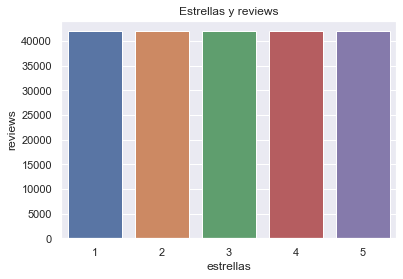

In [36]:
%matplotlib inline
sns.countplot(data=data,x='stars',orient="h")
plt.title("Estrellas y reviews")
plt.xlabel("estrellas")
plt.ylabel("reviews")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

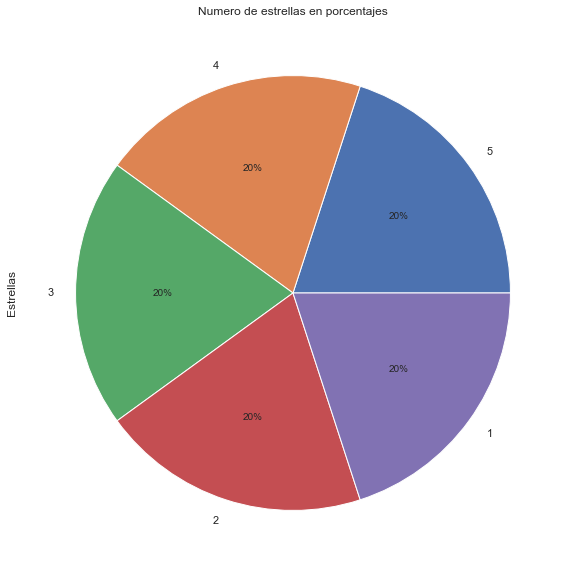

In [37]:
plt.figure(figsize=(10,10))
data.stars.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.ylabel("Estrellas")

plt.title("Numero de estrellas en porcentajes")
plt.show

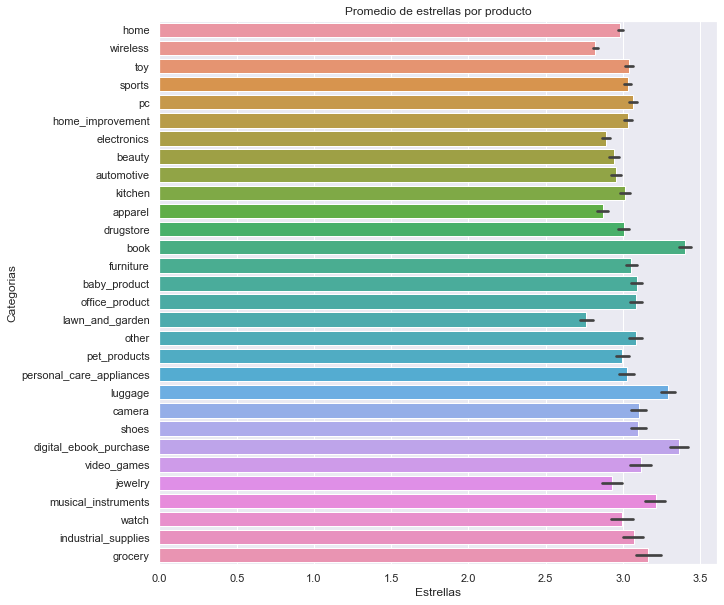

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x='stars', y='product_category' ,
            data=data,
            order = data.product_category.value_counts().index)

plt.ylabel("Categorias")
plt.xlabel("Estrellas")
plt.title("Promedio de estrellas por producto")
plt.show()

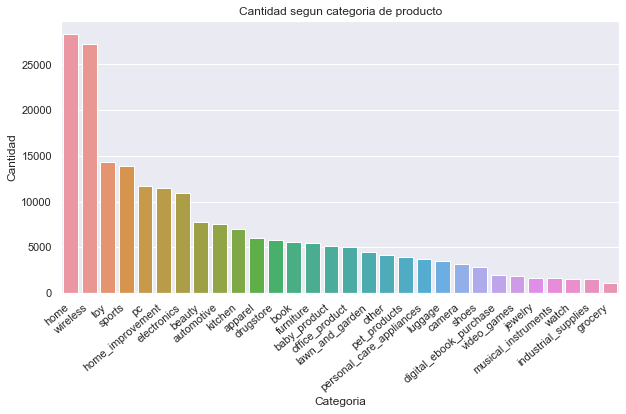

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = data, x = "product_category",
                   order = data.product_category.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.ylabel("Cantidad")
plt.xlabel("Categoria")
plt.title("Cantidad segun categoria de producto")
plt.show()

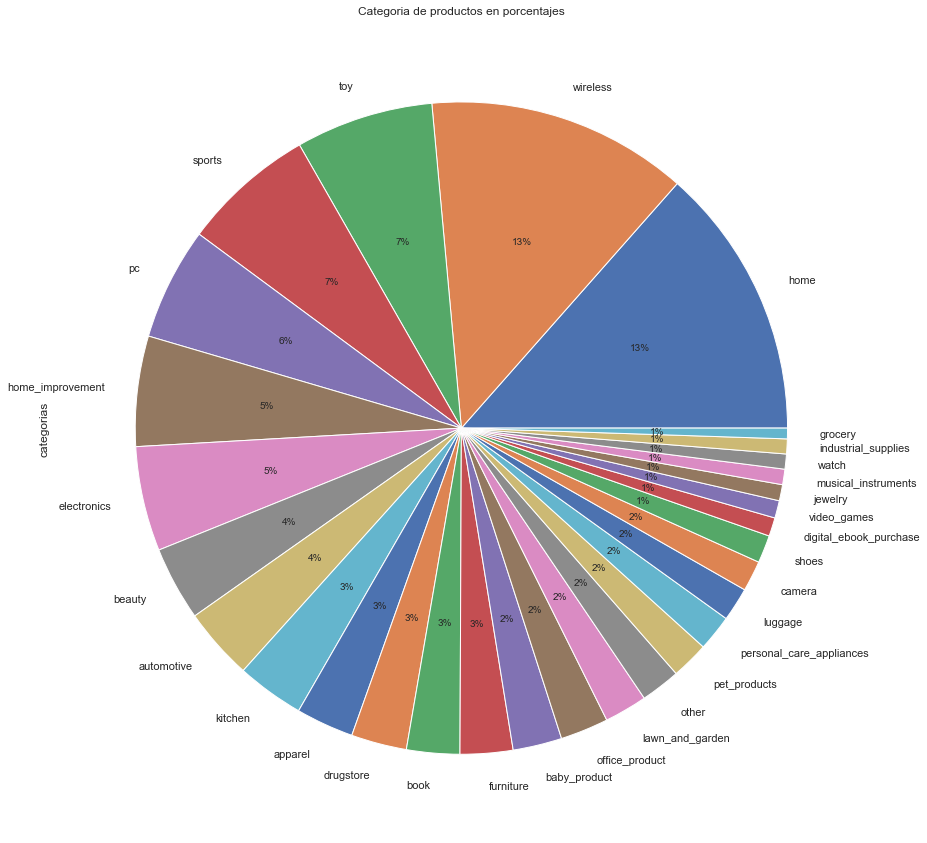

In [40]:
plt.figure(figsize=(22,15))
data.product_category.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.ylabel("categorias")

plt.title("Categoria de productos en porcentajes")
plt.show()

In [41]:
data.language.unique()

array(['es'], dtype=object)

#### Verificación de valores nulos.

In [42]:
data.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [43]:
len(data.reviewer_id.unique())

187140

#### Análisis en usuario individual

<font color=black>
Se verifica el id 0588051.
</font>

In [44]:
per_user=data["reviewer_id"].value_counts()
per_user

reviewer_es_0437514    7
reviewer_es_0588051    7
reviewer_es_0431022    7
reviewer_es_0035822    6
reviewer_es_0659252    6
                      ..
reviewer_es_0194269    1
reviewer_es_0973123    1
reviewer_es_0669602    1
reviewer_es_0792652    1
reviewer_es_0402651    1
Name: reviewer_id, Length: 187140, dtype: int64

In [45]:
user_unique=data[data.reviewer_id == "reviewer_es_0588051" ]
user_unique

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
82233,es_0673224,product_es_0616815,reviewer_es_0588051,3,"Generó super fino, se notan mucho las costuras...",No me la quede.,es,sports
84353,es_0188523,product_es_0145354,reviewer_es_0588051,3,"Me gusto mucho el tacto , pero el género hacía...",Calidad mediocre.,es,sports
87843,es_0254703,product_es_0420214,reviewer_es_0588051,3,"La idea y el producto yo se ve de calidad , pe...",Buena cosa,es,sports
113208,es_0535895,product_es_0481160,reviewer_es_0588051,3,"Calidad muy buena, pero las tallas no están mu...",No me fue bien la talla,es,pet_products
117067,es_0846764,product_es_0651420,reviewer_es_0588051,3,"Es un poco recio, y le pica el cuello a mi hij...",Normal,es,sports
131219,es_0999442,product_es_0740672,reviewer_es_0588051,4,"Parecía que quedaban bien los cristales, pero ...",Bastante bien,es,kitchen
154756,es_0051525,product_es_0258519,reviewer_es_0588051,4,"Va muy bien , cómodo y discreto",Fenomenal,es,apparel


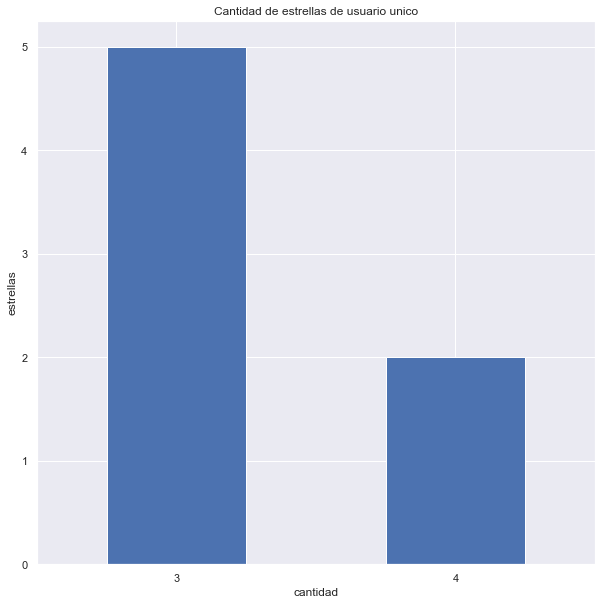

In [46]:
plt.figure(figsize=(10,10))
user_unique.stars.value_counts().plot(kind="bar")
plt.ylabel("estrellas")
plt.xlabel("cantidad")
plt.xticks(rotation=0)
plt.title("Cantidad de estrellas de usuario unico")
plt.show()

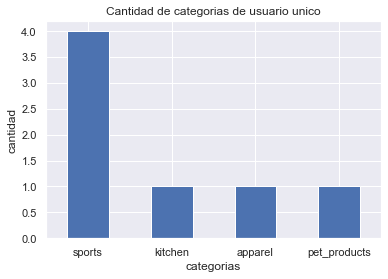

In [47]:
user_unique.product_category.value_counts().plot(kind="bar")
plt.ylabel("cantidad")
plt.xlabel("categorias")
plt.xticks(rotation=0)
plt.title("Cantidad de categorias de usuario unico")
plt.show()

In [48]:
list(user_unique['review_body'])[:5]

['Generó super fino, se notan mucho las costuras y no le fue bien, pero es bonita.',
 'Me gusto mucho el tacto , pero el género hacía bolas en una semana de uso.',
 'La idea y el producto yo se ve de calidad , pero en el envío me llego mal, la tapa no encajaba y así no se puede usar, porque una vez abierto se seca el resto .',
 'Calidad muy buena, pero las tallas no están muy bien . De una a otra es mucha la diferencia.',
 'Es un poco recio, y le pica el cuello a mi hijo ., no me lo quede.']

#### Procesamiento de datos

<font color=black>
Columnas de un solo valor
</font>

In [49]:
for i in range(data.shape[1]):
    print(i,len(pd.unique(data.iloc[:,i])))

0 210000
1 156458
2 187140
3 5
4 208127
5 117156
6 1
7 30


<font color=black>
Columnas con pocos valores.
</font>

In [50]:
for i in range(data.shape[1]):
    num=len(pd.unique(data.iloc[:,i]))
    porcentaje=float(num)/data.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

0, 210000, 100.0%
1, 156458, 74.5%
2, 187140, 89.1%
3, 5, 0.0%
4, 208127, 99.1%
5, 117156, 55.8%
6, 1, 0.0%
7, 30, 0.0%


<font color=black>
Datos duplicados.
</font>

In [51]:
duplicado = data.duplicated()
print(duplicado.any())
print(data[duplicado])

False
Empty DataFrame
Columns: [review_id, product_id, reviewer_id, stars, review_body, review_title, language, product_category]
Index: []


#### Eliminación de columnas sin valor.

In [52]:
data=data.drop(["review_id","product_id","reviewer_id","language"],axis=1)

In [53]:
data.head()

,stars,review_body,review_title,product_category
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes


### NLP

#### Preparación NLP

In [54]:
nlp = es_core_news_md.load() 

#### Preparación de Stopwords

In [55]:
stopwords_spacy = list(STOP_WORDS)
print(stopwords_spacy)
len(stopwords_spacy)

['estamos', 'informo', 'nuestros', 'ahora', 'haceis', 'comentó', 'mías', 'podeis', 'ellas', 'alguno', 'dio', 'podría', 'nuevos', 'quizás', 'buenas', 'excepto', 'hay', 'sabe', 'estas', 'llevar', 'aproximadamente', 'eramos', 'intentamos', 'lleva', 'había', 'segun', 'delante', 'estaba', 'valor', 'tal', 'trabajan', 'pronto', 'conocer', 'muy', 'realizar', 'toda', 'podriais', 'habia', 'tuyos', 'sea', 'ustedes', 'serán', 'deben', 'existen', 'mi', 'mios', 'ellos', 'ella', 'ayer', 'cuantos', 'parece', 'nuestra', 'podrán', 'mayor', 'cuántos', 'dicho', 'principalmente', 'estais', 'hicieron', 'propias', 'propio', 'cuenta', 'hoy', 'manifestó', 'sola', 'también', 'algunos', 'podemos', 'parte', 'sé', 'intentar', 'apenas', 'antes', 'hacia', 'primer', 'era', 'qeu', 'usted', 'última', 'creo', 'van', 'contra', 'cinco', 'ver', 'mal', 'da', 'realizó', 'otra', 'mejor', 'tuyas', 'teneis', 'debido', 'vuestros', 'habían', 'ultimo', 'cuánta', 'además', 'he', 'tres', 'poca', 'horas', 'buenos', 'podriamos', 'tu',

551

In [56]:
nlp = es_core_news_md.load() 
nlp.max_length = 2000000


stop_words=STOP_WORDS
stop_words.remove('peor')
stop_words.remove("bueno")
stop_words.remove("demasiado")
stop_words.remove("buena")
stop_words.remove("buen")
stop_words.remove("buenos")
stop_words.remove("despacio")
stop_words.remove("pocos")
stop_words.remove("poca")
stop_words.remove("bien")
stop_words.remove("raras")
stop_words.remove("ninguno")
stop_words.remove("ningunas")
stop_words.remove("no")
stop_words.remove("si")
stop_words.remove("sí")

#### Esta parte corresponde al tratamiento en los datos, se procede a:

<font color=black>
Realizar Tokenizacion, StopWords, Spellcheck y Lemmatizacion.
</font>

<font color=black>
Realizar Seleccion de adjetivos
</font>

<font color=black>
Guardar todo en un nuevo csv.
</font>

<font color=black>
Cargar el csv.
</font>

#### Considero necesario hacer las siguientes transformaciones 

Las transformaciones que se realizaron en el dataset, fueron las siguientes:

1. Eliminacion de todas las tildes,salvo la Ñ. Objetivo: reducir errores ortograficos.
1. Realizar una tokenizacion eliminando todo aquello que no sean letras.. Objetivo: Eliminacion de signos o caracteres especiales.
1. Llevar todas las palabras a minuscula. Objetivo: Reducir el trabajo al analizar el texto con palabras que significan lo mismo pero algunas utilizan mayusculas y otras no segun el contexto.
1. Utilizacion de stopwords. Objetivo: eliminar las palabras con poco valor para el analisis.
1. Spellcheck. Objetivo: aplicar correccion ortografica en todo el texto.
1. Spacy. Objetivo: Realizar una tokenizacion.
1. Lemmatizacion. Objetivo: Trabajar con los lemma de cada palabra.

<font color=red> Review_title y </font><font color=green>Review_body</font>

<font color=black>
Limpieza de tildes,salvo la Ñ en:
</font>

<font color=red>
Review_title
</font>

In [57]:
revs=[]

for i in range(data.shape[0]):
    review = data.iloc[i].review_title 
    review = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", review), 0, re.I
    )
    review=normalize( 'NFC', review)
    revs.append(review)

In [58]:
data["New_R_title"]=pd.Series(revs)

<font color=black>
Limpieza de tildes,salvo la Ñ en:
</font>

<font color=green>
Review_body
</font>

In [59]:
revs=[]

for i in range(data.shape[0]):
    review = data.iloc[i].review_body
    review = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", review), 0, re.I
    )
    review=normalize( 'NFC', review)
    revs.append(review)

In [60]:
data["New_R_body"]=pd.Series(revs)

#### Spellchecker

In [61]:
spell = SpellChecker(language='es',distance=1)

<font color=black>
Tokenizacion, StopWords, Spellcheck y Lemmatizacion en:
</font>

<font color=red>
Review_title
</font>

In [62]:
def spell_check(x):
    correct_word = []
    mispelled_word = x
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

In [63]:
%%time

regexp=RegexpTokenizer(r"\w+")
tokeandstp=[]
data['New_R_title_Lemm'] = ''

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_title
    review = regexp.tokenize(review)
    review = [word.lower() for word in review if word.lower() not in stop_words]
    review = spell_check(review)
    review = nlp(review) 
    review = [word.lemma_ for word in review]
    data['New_R_title_Lemm'].iloc[i] = ' '.join(review)

C:\Users\Gammapeit\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Wall time: 34min 8s


In [64]:
data.drop("New_R_title",axis=1,inplace=True)

<font color=black>
Tokenizacion, StopWords, Spellcheck y Lemmatizacion en:
</font>

<font color=green>
Review_body
</font>

In [65]:
def spell_check(x):
    correct_word = []
    mispelled_word = x
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

In [66]:
%%time

tokeandstp=[]
regexp=RegexpTokenizer(r"\w+")
data['New_R_body_Lemm'] = ''

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_body
    review = regexp.tokenize(review) 
    review = [word.lower() for word in review if word.lower() not in stop_words]
    review = spell_check(review)
    review = nlp(review)
    review = [word.lemma_ for word in review]
    data['New_R_body_Lemm'].iloc[i] = ' '.join(review)

Wall time: 43min 28s


In [67]:
data.drop("New_R_body",axis=1,inplace=True)

#### Trabajar con adjetivos

In [68]:
data.isna().sum()

stars               0
review_body         0
review_title        0
product_category    0
New_R_title_Lemm    0
New_R_body_Lemm     0
dtype: int64

<font color=black>
Debemos eliminar los NA antes de proseguir.
</font>

In [69]:
data = data.dropna(subset=['New_R_title_Lemm',"New_R_body_Lemm"])

<font color=red>
Review_title Adj
</font>

In [70]:
%%time

adjetivos = []

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_title_Lemm
    review = nlp(review)
    review = [word for word in review if word.pos_ == "ADJ"]
    adjetivos.append(review)

Wall time: 24min 7s


In [71]:
data["New_R_title_Lemm_ADJ"] = pd.Series(adjetivos)

<font color=green>
Review_Body Adj
</font>

In [72]:
%%time


adjetivos = []

for i in range(data.shape[0]):
    review = data.iloc[i].New_R_body_Lemm
    review = nlp(review)
    review = [word for word in review if word.pos_ == "ADJ"]
    adjetivos.append(review)

Wall time: 32min 47s


In [73]:
data["New_R_body_Lemm_ADJ"] = pd.Series(adjetivos)

#### Guardado y carga del CSV

In [74]:
data.to_csv('Amazon-Datas1.0.csv', index = False, encoding = 'utf-8')

In [75]:
#data = pd.read_csv('../input/amazoncorpuesespanol/Amazon-Datas1.0.csv')
data = pd.read_csv('Amazon-Datas1.0.csv')

In [76]:
data.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]"
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]"
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico]
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]"
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado]


#### Analisis Adjetivos

<font color=red>
Review_title
</font>

In [77]:
dfstar1 = data[data.stars == 1]
dfstar2 = data[data.stars == 2]
dfstar3 = data[data.stars == 3]
dfstar4 = data[data.stars == 4]
dfstar5 = data[data.stars == 5]

#### 1 Estrella

In [78]:
dfstar1 = dfstar1.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar1['New_R_title_Lemm_ADJ']=dfstar1['New_R_title_Lemm_ADJ'].apply(str)

In [79]:
star1 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar1.shape[0]):
    x = dfstar1.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star1.append(x) 

In [80]:
words_star1=[line for line in star1 for line in set(line)]
words_star1 = Counter(words_star1)
words_star1 = words_star1.most_common(20)
words_star1=pd.DataFrame(words_star1,columns = ['Words', 'Frequency'])
words_star1.head(10)

,Words,Frequency
0,malo,3271
1,roto,854
2,pesimo,732
3,defectuoso,584
4,fatal,577
5,pedido,529
6,pequeño,495
7,recomendable,444
8,decepcionado,422
9,malisimo,413


#### 2 Estrellas

In [81]:
dfstar2.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ
40000,2,"Los tornillos no ajustan bien, se caen. No lo ...",Regular,toy,regular,tornillo no ajustar bien caer no volveria a co...,[],[]
40001,2,Si haces varias impresiones seguidas aparecen ...,LAS IMPRESIONES NO SON DE MUY BUENA CALIDAD,office_product,impresión no buen calidad,si impresión seguido aparecer borroso zona si ...,[buen],"[seguido, borroso, negro, homogéneo]"
40002,2,es pequeño no coincide con la pantalla del a1,pequeño,wireless,pequeño,pequeño no coincidir pantalla a,[pequeño],[pequeño]
40003,2,No lleva nada para trasportarla y es un poco r...,No lo mandan completo,sports,no mandar completo,no transportar él y rigido,[completo],[]
40004,2,"a ver si me explico , su software reconoce las...",USB 3.0 Adaptador de red de doble banda????,wireless,usb 3 0 adaptador red doble banda,a si explicar software reconocer 2 4 gaz 5 gaz...,[doble],[doble]


In [82]:
dfstar2 = dfstar2.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar2['New_R_title_Lemm_ADJ']=dfstar2['New_R_title_Lemm_ADJ'].apply(str)

In [83]:
star2 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar2.shape[0]):
    x = dfstar2.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star2.append(x)

In [84]:
words_star2=[line for line in star2 for line in set(line)]
words_star2 = Counter(words_star2)
words_star2 = words_star2.most_common(20)
words_star2=pd.DataFrame(words_star2,columns = ['Words', 'Frequency'])
words_star2.head(10)

,Words,Frequency
0,malo,2016
1,pequeño,1170
2,buen,1034
3,roto,549
4,bonito,536
5,decepcionado,448
6,caro,407
7,duro,367
8,defectuoso,340
9,bueno,335


#### 3 Estrellas

In [85]:
dfstar3 = dfstar3.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar3['New_R_title_Lemm_ADJ']=dfstar3['New_R_title_Lemm_ADJ'].apply(str)

In [86]:
star3 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar3.shape[0]):
    x = dfstar3.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star3.append(x)

In [87]:
words_star3=[line for line in star3 for line in set(line)]
words_star3 = Counter(words_star3)
words_star3 = words_star3.most_common(20)
words_star3=pd.DataFrame(words_star3,columns = ['Words', 'Frequency'])
words_star3.head(10)

,Words,Frequency
0,buen,2788
1,pequeño,1223
2,bonito,1043
3,correcto,855
4,bueno,763
5,malo,595
6,aceptable,537
7,normal,407
8,caro,383
9,mejorable,367


#### 4 Estrellas

In [88]:
dfstar4 = dfstar4.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar4['New_R_title_Lemm_ADJ']=dfstar4['New_R_title_Lemm_ADJ'].apply(str)

In [89]:
star4 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar4.shape[0]):
    x = dfstar4.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star4.append(x) 

In [90]:
words_star4=[line for line in star4 for line in set(line)]
words_star4 = Counter(words_star4)
words_star4 = words_star4.most_common(20)
words_star4=pd.DataFrame(words_star4,columns = ['Words', 'Frequency'])
words_star4.head(10)

,Words,Frequency
0,buen,7346
1,perfecto,1443
2,bonito,1271
3,correcto,1142
4,bueno,1141
5,practico,665
6,util,641
7,comodo,612
8,recomendable,564
9,facil,503


#### 5 Estrellas

In [91]:
dfstar5 = dfstar5.dropna(subset=["New_R_title_Lemm_ADJ"])
dfstar5['New_R_title_Lemm_ADJ']=dfstar5['New_R_title_Lemm_ADJ'].apply(str)

In [92]:
star5 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar5.shape[0]):
    x = dfstar5.iloc[i].New_R_title_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star5.append(x) 

In [93]:
words_star5=[line for line in star5 for line in set(line)]
words_star5 = Counter(words_star5)
words_star5 = words_star5.most_common(20)
words_star5=pd.DataFrame(words_star5,columns = ['Words', 'Frequency'])
words_star5.head(10)

,Words,Frequency
0,buen,6485
1,perfecto,3966
2,genial,1393
3,excelente,1115
4,bonito,1082
5,recomendable,943
6,bueno,935
7,comodo,626
8,practico,582
9,util,556


### Mejorando la visualización

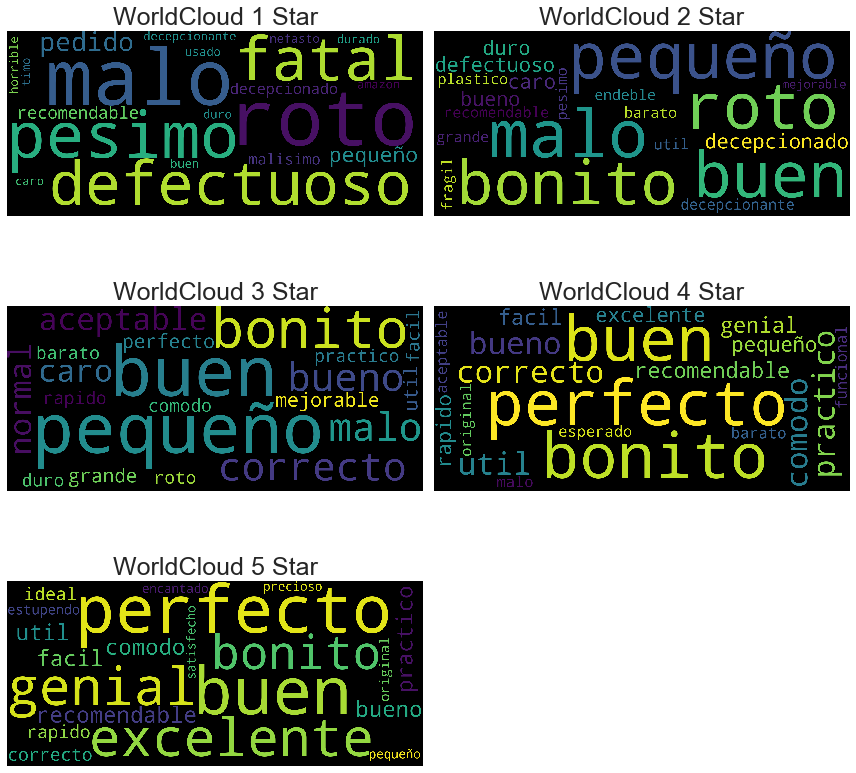

In [94]:
plt.figure(figsize=(12,12))

plt.subplot(321)
estrella1=(" ").join(words_star1["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(estrella1)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 1 Star', fontsize=25)

plt.subplot(322)
estrella2=(" ").join(words_star2["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella2)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 2 Star', fontsize=25)

plt.subplot(323)
estrella3=(" ").join(words_star3["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella3)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 3 Star', fontsize=25)

plt.subplot(324)
estrella4=(" ").join(words_star4["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella4)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 4 Star', fontsize=25)

plt.subplot(325)
estrella5=(" ").join(words_star5["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella5)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 5 Star', fontsize=25)

plt.tight_layout()
plt.show()

<font color=green>
Review_Body
</font>

#### 1 Estrella

In [95]:
dfstar1 = dfstar1.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar1['New_R_body_Lemm_ADJ']=dfstar1['New_R_body_Lemm_ADJ'].apply(str)

In [96]:
star1 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar1.shape[0]):
    x = dfstar1.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star1.append(x) 

In [97]:
words_star1=[line for line in star1 for line in set(line)]
words_star1 = Counter(words_star1)
words_star1 = words_star1.most_common(20)
words_star1=pd.DataFrame(words_star1,columns = ['Words', 'Frequency'])
words_star1.head(10)

,Words,Frequency
0,malo,3492
1,roto,2301
2,pedido,1941
3,pequeño,1804
4,amazon,1735
5,buen,1458
6,llegado,1368
7,plastico,1229
8,devuelto,1115
9,duro,1075


#### 2 Estrellas

In [98]:
dfstar2 = dfstar2.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar2['New_R_body_Lemm_ADJ']=dfstar2['New_R_body_Lemm_ADJ'].apply(str)

In [99]:
star2 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar2.shape[0]):
    x = dfstar2.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star2.append(x) 

In [100]:
words_star2=[line for line in star2 for line in set(line)]
words_star2 = Counter(words_star2)
words_star2 = words_star2.most_common(20)
words_star2=pd.DataFrame(words_star2,columns = ['Words', 'Frequency'])
words_star2.head(10)

,Words,Frequency
0,buen,3318
1,pequeño,3110
2,malo,2545
3,bonito,1918
4,roto,1686
5,plastico,1607
6,bueno,1340
7,duro,1340
8,grande,1137
9,gustado,1013


#### 3 Estrellas

In [101]:
dfstar3 = dfstar3.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar3['New_R_body_Lemm_ADJ']=dfstar3['New_R_body_Lemm_ADJ'].apply(str)

In [102]:
star3 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar3.shape[0]):
    x = dfstar3.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star3.append(x) 

In [103]:
words_star3=[line for line in star3 for line in set(line)]
words_star3 = Counter(words_star3)
words_star3 = words_star3.most_common(20)
words_star3=pd.DataFrame(words_star3,columns = ['Words', 'Frequency'])
words_star3.head(10)

,Words,Frequency
0,buen,4931
1,pequeño,3412
2,bonito,2400
3,bueno,1654
4,grande,1590
5,perfecto,1531
6,plastico,1450
7,malo,1412
8,facil,1303
9,unico,1281


#### 4 Estrellas

In [104]:
dfstar4 = dfstar4.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar4['New_R_body_Lemm_ADJ']=dfstar4['New_R_body_Lemm_ADJ'].apply(str)

In [105]:
star4 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar4.shape[0]):
    x = dfstar4.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star4.append(x)

In [106]:
words_star4=[line for line in star4 for line in set(line)]
words_star4 = Counter(words_star4)
words_star4 = words_star4.most_common(20)
words_star4=pd.DataFrame(words_star4,columns = ['Words', 'Frequency'])
words_star4.head(10)

,Words,Frequency
0,buen,9311
1,perfecto,3559
2,unico,2584
3,facil,2518
4,pequeño,2498
5,bonito,2454
6,rapido,1789
7,comodo,1680
8,bueno,1595
9,correcto,1388


#### 5 Estrellas

In [107]:
dfstar5 = dfstar5.dropna(subset=["New_R_body_Lemm_ADJ"])
dfstar5['New_R_body_Lemm_ADJ']=dfstar5['New_R_body_Lemm_ADJ'].apply(str)

In [108]:
star5 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar5.shape[0]):
    x = dfstar5.iloc[i].New_R_body_Lemm_ADJ
    x = regexp.tokenize(x) 
    x = [t for t in x if len(t)>1] 
    star5.append(x) 

In [109]:
words_star5=[line for line in star5 for line in set(line)]
words_star5 = Counter(words_star5)
words_star5 = words_star5.most_common(20)
words_star5=pd.DataFrame(words_star5,columns = ['Words', 'Frequency'])
words_star5.head(10)

,Words,Frequency
0,buen,9947
1,perfecto,6620
2,facil,3103
3,rapido,2727
4,bonito,2678
5,genial,2411
6,encantado,2113
7,comodo,1963
8,recomendable,1933
9,pequeño,1784


### Mejorando la visualización

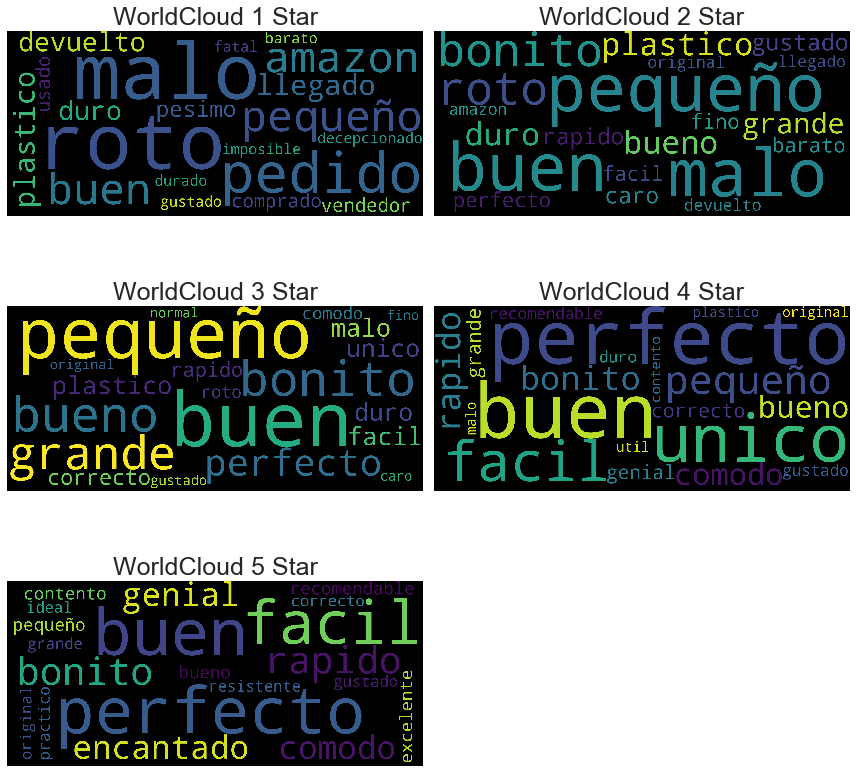

In [110]:
plt.figure(figsize=(12,12))

plt.subplot(321)
estrella1=(" ").join(words_star1["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800 ).generate(estrella1)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 1 Star', fontsize=25)

plt.subplot(322)
estrella2=(" ").join(words_star2["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella2)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 2 Star', fontsize=25)

plt.subplot(323)
estrella3=(" ").join(words_star3["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella3)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 3 Star', fontsize=25)

plt.subplot(324)
estrella4=(" ").join(words_star4["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella4)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 4 Star', fontsize=25)

plt.subplot(325)
estrella5=(" ").join(words_star5["Words"])
wc = WordCloud(max_words = 20, width = 1800 , height = 800).generate(estrella5)
plt.imshow(wc)
plt.axis("off")
plt.title('WorldCloud 5 Star', fontsize=25)

plt.tight_layout()
plt.show()

<font color=black>
Los Estudios indican que las criticas negativas normalmente incluyen más palabras que las positivas ¿Será Verdad?
</font>

<font color=red>
Review_title
</font>

In [111]:
data['contara_title'] = data["review_title"].apply(lambda x: len(str(x).split()))
data.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ,contara_title
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]",2
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]",8
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico],10
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]",3
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado],1


<font color=green>
Review_body
</font>

In [112]:
data['contara_body'] = data["review_body"].apply(lambda x: len(str(x).split()))
data.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ,contara_title,contara_body
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]",2,19
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]",8,23
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico],10,22
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]",3,60
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado],1,7


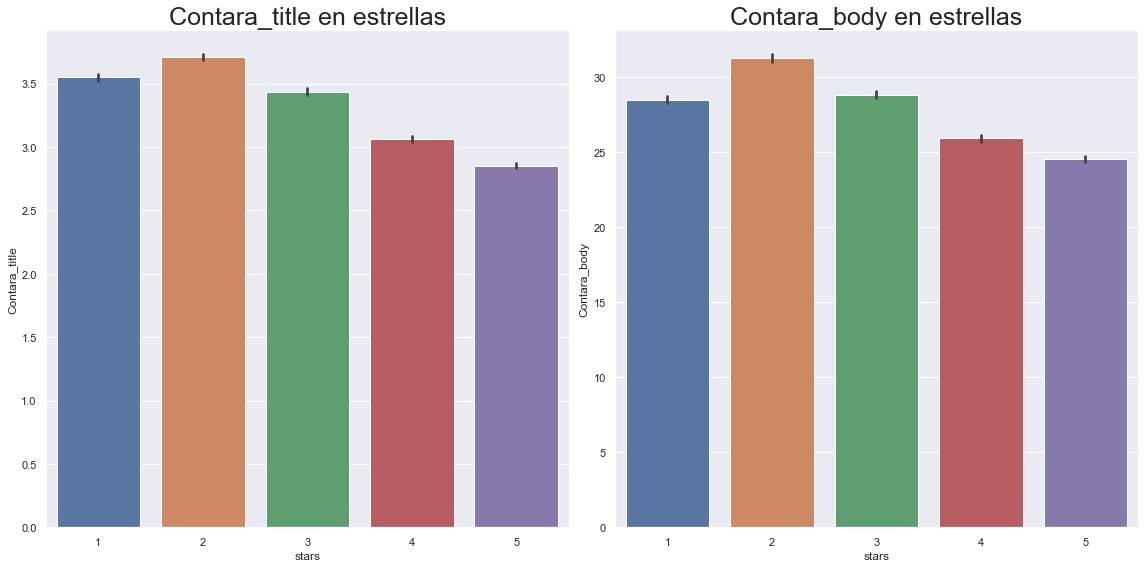

In [113]:
plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data = data, x = "stars", y = "contara_title")
plt.title('Contara_title en estrellas', fontsize= 25)
plt.xlabel('stars')
plt.ylabel('Contara_title')

plt.subplot(122)
sns.barplot(data = data, x = "stars", y = "contara_body")
plt.title('Contara_body en estrellas', fontsize= 25)
plt.xlabel('stars')
plt.ylabel('Contara_body')

plt.tight_layout()
plt.show()

<font color=black>
Los resultados indican que las reseñas negativas tienen mas palabras que las positivas.
</font>

In [114]:
gc.collect

<function gc.collect(generation=2)>

#### Limpieza de NA

In [115]:
data.isna().sum()

stars                      0
review_body                0
review_title               0
product_category           0
New_R_title_Lemm        3292
New_R_body_Lemm           19
New_R_title_Lemm_ADJ       0
New_R_body_Lemm_ADJ        0
contara_title              0
contara_body               0
dtype: int64

In [116]:
data.dropna(inplace=True)

In [117]:
data.describe()

,stars,contara_title,contara_body
count,206692.000000,206692.000000,206692.000000
mean,3.007368,3.345756,27.892700
std,1.413549,2.527525,24.223703
min,1.000000,1.000000,2.000000
25%,2.000000,2.000000,13.000000
50%,3.000000,3.000000,22.000000
75%,4.000000,4.000000,34.000000
max,5.000000,28.000000,551.000000


### Machine Learning

### 2. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.

<font color=black>
Para evaluar los resultados se trabajara con Accuracy debido a que el dataset se encuentra perfectamente balanceado, ya que cada estrella representa un 20% del dataset.
</font>

### 3. Elige un modelo benchmark y compara tus resultados con este modelo.

<font color=black>
El Benchmark utilizado es GaussianNB debido a que Naive Bayes suele ser uno de los mejores modelos para NLP.
</font>

#### Para la primera prueba solo trabajaremos con lemms

In [118]:
data.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ,contara_title,contara_body
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]",2,19
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]",8,23
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico],10,22
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]",3,60
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado],1,7


In [119]:
data_=data.copy()

In [120]:
data_['review_Final'] = data_['New_R_title_Lemm'] + ' ' + data_['New_R_body_Lemm']
data_.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ,contara_title,contara_body,review_Final
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]",2,19,television never bueno ka pantalla 8 mes y no ...
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]",8,23,dinero tirado a basura comprar horrible tener ...
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico],10,22,llegar unidad obligar a comprar obligar a comp...
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]",3,60,producto no recibir no entrar descalificar ven...
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado],1,7,devuelto llegar y co talla equivocado


#### spell_check (corrección ortográfica)

In [121]:
%%time

def spell_check(x):
    correct_word = []
    mispelled_word = x
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

tokeandstp=[]
regexp=RegexpTokenizer(r"\w+")
data_['New_R_final_Lemm'] = ''

for i in range(data_.shape[0]):
    review = data_.iloc[i].review_Final
    review = regexp.tokenize(review) 
    review = [word.lower() for word in review if word.lower() not in stop_words]
    review = spell_check(review)
    review = nlp(review)
    review = [word.lemma_ for word in review]
    data_['New_R_final_Lemm'].iloc[i] = ' '.join(review)

C:\Users\Gammapeit\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Wall time: 46min 14s


#### Guardado y Carga de CSV

In [122]:
data_.to_csv('Amazon-Datas2.0.csv', index = False, encoding = 'utf-8')

In [123]:
data_ = pd.read_csv('Amazon-Datas2.0.csv')

In [124]:
data_['New_R_final_Lemm'] = data_['New_R_final_Lemm'].apply(str)

In [125]:
list_revs = list(data_['New_R_final_Lemm'].values)
stars_ = data_["stars"].values

In [126]:
type(list_revs)

list

In [127]:
tfidf = TfidfVectorizer(max_features=1000,lowercase=False)

In [128]:
matriz_revs = tfidf.fit_transform(list_revs)

# Tomamos las palabras
all_words = tfidf.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['10', '100', '12', '15', '20', '24', '30', '40', '50', 'abajo', 'abierto', 'abrir', 'absoluto', 'acabado', 'acabar', 'accesorio', 'aceite', 'aceptable', 'acero', 'acierto', 'acolchado', 'aconsejar', 'acoplar', 'adaptador', 'adaptar', 'adecuado', 'adherir', 'adhesivo', 'adulto', 'agarrar', 'agarre', 'agradable', 'agua', 'aguantar', 'agujero', 'aguo', 'aire', 'ajustado', 'ajustar', 'ajuste', 'alguien', 'algun', 'altavoz', 'alto', 'altura', 'alumbrar', 'amarillo', 'amazon', 'amigo', 'amplio']


### Modelado

#### Train_Test_Split

In [129]:
x = matriz_revs.toarray()
y = stars_


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

#### Función para ver Confusion

In [130]:
def confusion(y_test,y_test_pred,X):
    names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(8,8))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

#### NB (Benchmark)

In [131]:
nb = GaussianNB()
nb.fit(X_train,y_train)

y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

print("Accuracy train GaussianNB: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test GaussianNB: ", accuracy_score(y_test, y_test_pred))

Accuracy train GaussianNB:  0.4230529982582732
Accuracy test GaussianNB:  0.4058347310024513


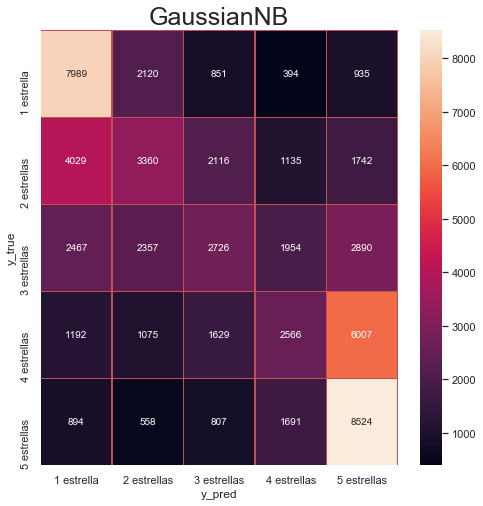

In [132]:
confusion(y_test,y_test_pred,"GaussianNB")

In [133]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           1       0.48      0.65      0.55     12289
           2       0.35      0.27      0.31     12382
           3       0.34      0.22      0.27     12394
           4       0.33      0.21      0.25     12469
           5       0.42      0.68      0.52     12474

    accuracy                           0.41     62008
   macro avg       0.39      0.41      0.38     62008
weighted avg       0.39      0.41      0.38     62008



#### LinearSVC

In [134]:
svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Accuracy train LinearSVC: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y_test, y_test_pred))

Accuracy train LinearSVC:  0.5085151087888087
Accuracy test LinearSVC:  0.4915494774867759


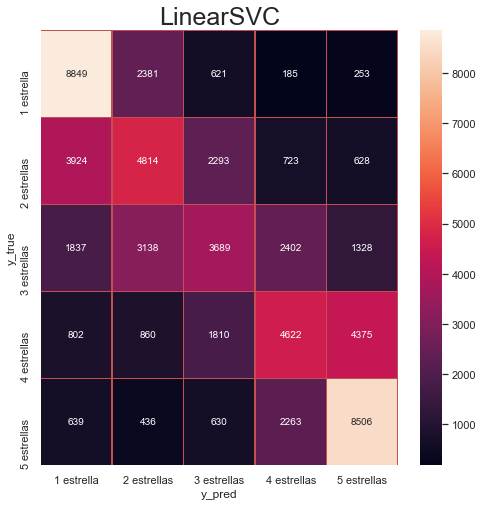

In [135]:
confusion(y_test,y_test_pred,"LinearSVC")

In [136]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.55      0.72      0.62     12289
           2       0.41      0.39      0.40     12382
           3       0.41      0.30      0.34     12394
           4       0.45      0.37      0.41     12469
           5       0.56      0.68      0.62     12474

    accuracy                           0.49     62008
   macro avg       0.48      0.49      0.48     62008
weighted avg       0.48      0.49      0.48     62008



### 4. Optimización de los hiperparámetros del modelo

<font color=black>
Se utiliza GridSearchCV para la optimizacion del LinerarSVC. Solo se trabajara con C.
</font>

### LinearSVC Optimizado con Gridsearch

In [137]:
param_grid = {'C': [0.1,1,3,6] }  
  
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3,n_jobs=-1) 

grid.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1, param_grid={'C': [0.1, 1, 3, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [138]:
print(grid.best_estimator_) 

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [139]:
print(grid.best_params_)

{'C': 0.1}


In [140]:
svc = LinearSVC(C = 0.1)
svc.fit(X_train,y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Accuracy train LinearSVC: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y_test, y_test_pred))

Accuracy train LinearSVC:  0.5082040861463604
Accuracy test LinearSVC:  0.4921784285898594


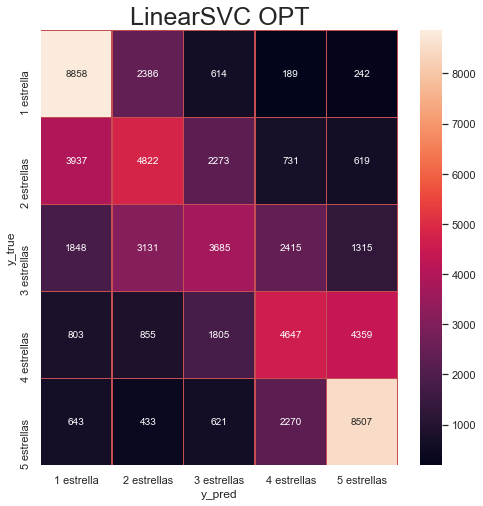

In [141]:
confusion(y_test,y_test_pred,"LinearSVC OPT")

In [142]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           1       0.55      0.72      0.62     12289
           2       0.41      0.39      0.40     12382
           3       0.41      0.30      0.34     12394
           4       0.45      0.37      0.41     12469
           5       0.57      0.68      0.62     12474

    accuracy                           0.49     62008
   macro avg       0.48      0.49      0.48     62008
weighted avg       0.48      0.49      0.48     62008



In [143]:
gc.collect

<function gc.collect(generation=2)>

### 5. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

<font color=black>
A continuacion se presentan las palabras que utiliza el LinearSVC para predecir.
</font>

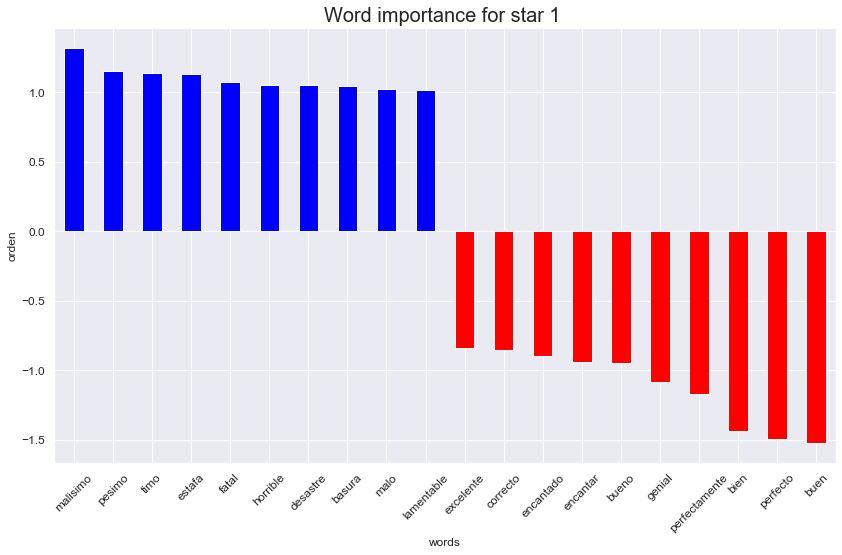

In [144]:
coeff = list(svc.coef_[0])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'blue', False: 'red'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for star 1 ',fontsize=20)
plt.show()

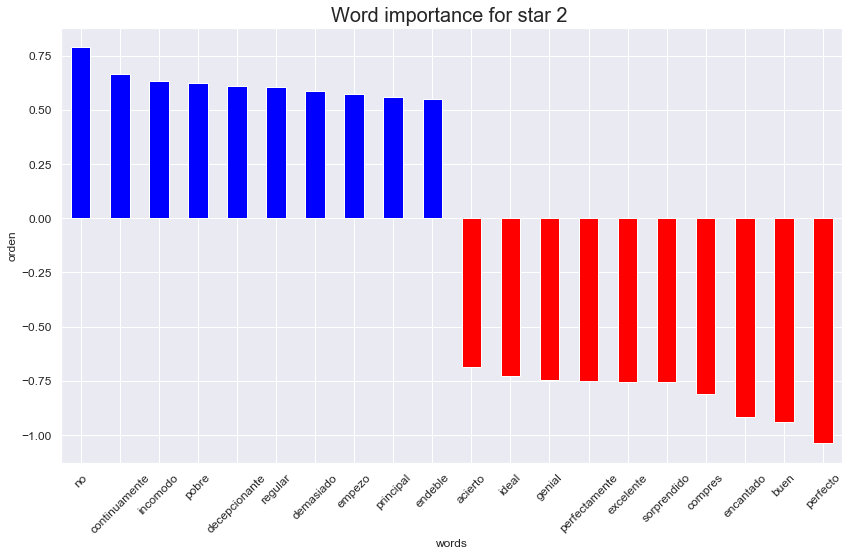

In [145]:
coeff = list(svc.coef_[1])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'blue', False: 'red'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for star 2 ',fontsize=20)
plt.show()

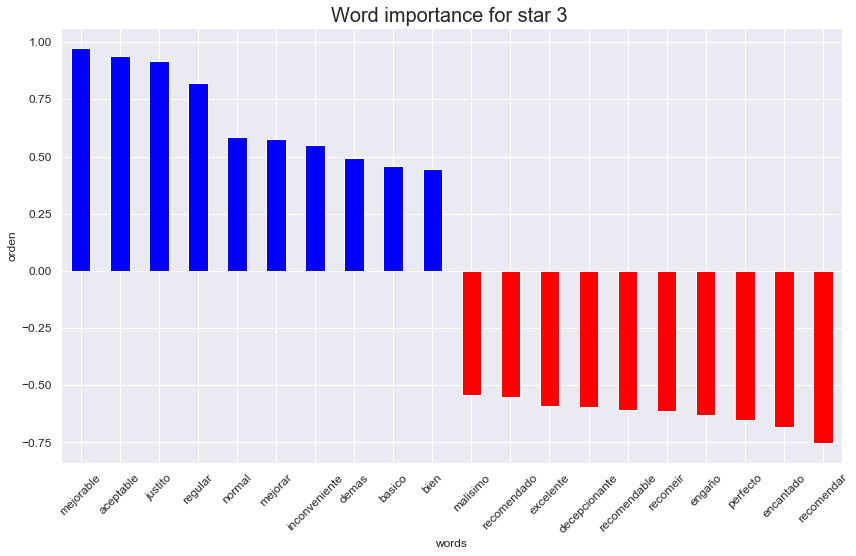

In [146]:
coeff = list(svc.coef_[2])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'blue', False: 'red'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for star 3 ',fontsize=20)
plt.show()

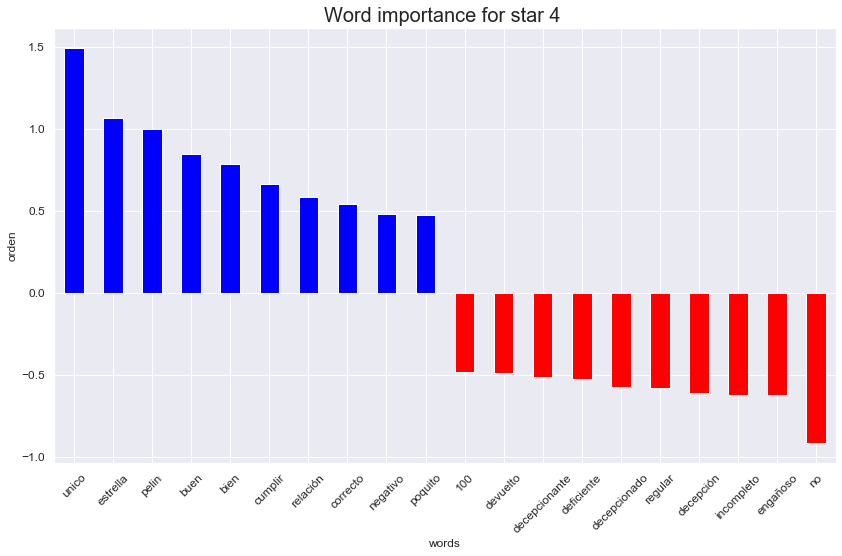

In [147]:
coeff = list(svc.coef_[3])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'blue', False: 'red'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for star 4 ',fontsize=20)
plt.show()

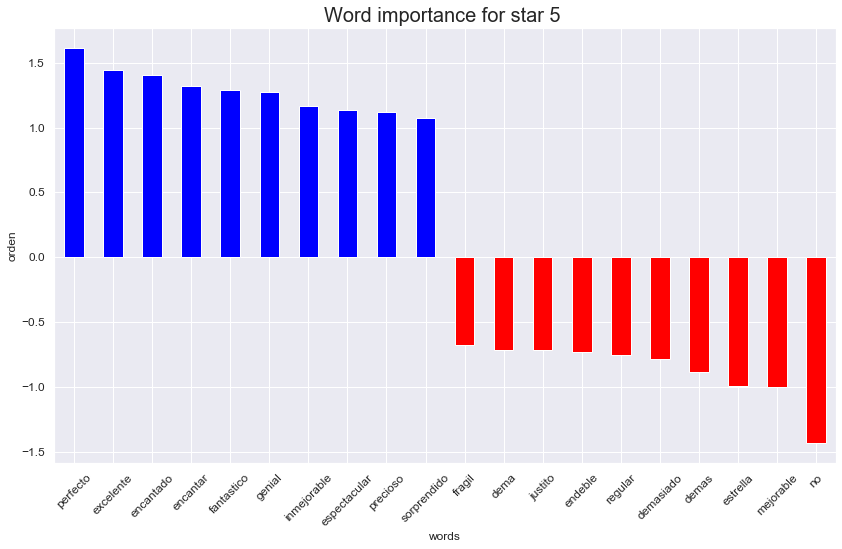

In [148]:
coeff = list(svc.coef_[4])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'blue', False: 'red'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for star 5 ',fontsize=20)
plt.show()

#### ¿Hay algo que te gustaría investigar o probar?

<font color=black>
Voy a utilizar redes neuronales para ver si se puede lograr un mejor resultado. 
</font>

### Redes Neuronales

#### Guardado y Carga de CSV

In [149]:
data_.to_csv('Amazon-Datas3.0.csv', index = False, encoding = 'utf-8')

In [151]:
data_ = pd.read_csv('Amazon-Datas3.0.csv')

In [152]:
def confusion(y_test,y_test_pred,X):
    names=["1 estrella","2 estrellas", "3 estrellas", "4 estrellas", "5 estrellas"]
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(8,8))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

In [154]:
import tensorflow as tf

In [155]:
from tensorflow import keras
from tensorflow.keras import layers

In [158]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers.core import SpatialDropout1D
import keras
from keras.layers.convolutional import Conv1D   
from numpy import array
from numpy import asarray
from numpy import zeros

Using TensorFlow backend.


In [159]:
data_['New_R_final_Lemm']=data_['New_R_final_Lemm'].apply(str)

In [160]:
X = data_['New_R_final_Lemm']
y = data_["stars"].values

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [162]:
data_.head()

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ,contara_title,contara_body,review_Final,New_R_final_Lemm
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]",2,19,television never bueno ka pantalla 8 mes y no ...,television never bueno ka pantalla 8 mes y no ...
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]",8,23,dinero tirado a basura comprar horrible tener ...,dinero tirado a basura comprar horrible compra...
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico],10,22,llegar unidad obligar a comprar obligar a comp...,llegar unidad obligar a comprar obligar a comp...
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]",3,60,producto no recibir no entrar descalificar ven...,producto no recibir no entrar descalificar ven...
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado],1,7,devuelto llegar y co talla equivocado,devuelto llegar y co talla equivocado


In [163]:
data_.shape

(206692, 12)

### Red Neuronal Simple

In [164]:
max_words = 5000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = tokenizer.sequences_to_matrix(X_train, mode='count')
X_test = tokenizer.sequences_to_matrix(X_test, mode='count')


num_classes = max(y_train) + 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [165]:
model = Sequential()
model.add(Dense(128, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [166]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
print(model.metrics_names)

['loss', 'accuracy']


In [167]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               640128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [168]:
batch_size = 128
epochs = 20

In [169]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Train on 115747 samples, validate on 28937 samples
Epoch 1/20
115747/115747 [==============================] - 32s 280us/step - loss: 1.6362 - accuracy: 0.2639 - val_loss: 1.4749 - val_accuracy: 0.3748
Epoch 2/20
115747/115747 [==============================] - 26s 223us/step - loss: 1.4747 - accuracy: 0.3372 - val_loss: 1.3432 - val_accuracy: 0.4306
Epoch 3/20
115747/115747 [==============================] - 32s 274us/step - loss: 1.3864 - accuracy: 0.3810 - val_loss: 1.2778 - val_accuracy: 0.4514
Epoch 4/20
115747/115747 [==============================] - 26s 224us/step - loss: 1.3412 - accuracy: 0.4040 - val_loss: 1.2465 - val_accuracy: 0.4667
Epoch 5/20
115747/115747 [==============================] - 22s 191us/step - loss: 1.3122 - accuracy: 0.4177 - val_loss: 1.2232 - val_accuracy: 0.4764
Epoch 6/20
115747/115747 [==============================] - 21s 182us/step - loss: 1.2893 - accuracy: 0.4329 - val_loss: 1.2090 - val_accuracy: 0.4803
Epoch 7/20
115747/115747 [=================

In [170]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

62008/62008 [==============================] - 6s 104us/step
Test loss: 1.1552416520831723
Test accuracy: 0.5010160207748413


In [171]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test=np.argmax(y_test, axis=1)
y_test_pred=np.argmax(y_test_pred, axis=1)

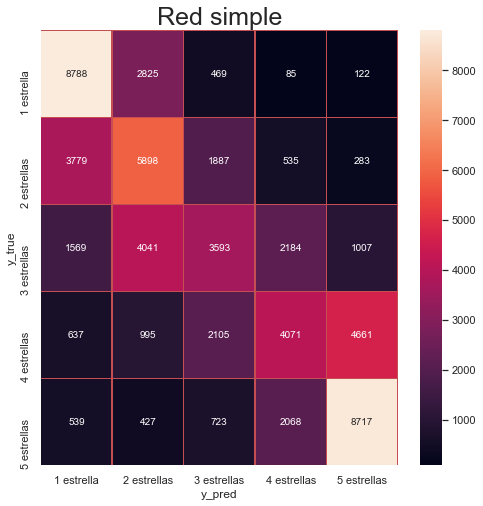

In [172]:
confusion(y_test,y_test_pred,"Red simple")

In [173]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           1       0.57      0.72      0.64     12289
           2       0.42      0.48      0.44     12382
           3       0.41      0.29      0.34     12394
           4       0.46      0.33      0.38     12469
           5       0.59      0.70      0.64     12474

    accuracy                           0.50     62008
   macro avg       0.49      0.50      0.49     62008
weighted avg       0.49      0.50      0.49     62008



In [174]:
gc.collect

<function gc.collect(generation=2)>

### Convolucional

In [175]:
X = data_['New_R_final_Lemm']
y = data_["stars"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

MAX_NB_WORDS = 5000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)



num_classes = max(y_train) + 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [176]:
EMBEDDING_DIM=300

In [177]:
model = Sequential()
embedding_layer= (Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(embedding_layer)
model.add(Conv1D(300, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(150, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [178]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 300)          1500000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 246, 300)          450300    
_________________________________________________________________
dropout_4 (Dropout)          (None, 246, 300)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               45150     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)              

In [179]:
epochs = 20
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

C:\Users\Gammapeit\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 115747 samples, validate on 28937 samples
Epoch 1/20
115747/115747 [==============================] - 1620s 14ms/step - loss: 1.2697 - acc: 0.4404 - val_loss: 1.1340 - val_acc: 0.5083
Epoch 2/20
115747/115747 [==============================] - 1544s 13ms/step - loss: 1.1503 - acc: 0.5078 - val_loss: 1.1229 - val_acc: 0.5110
Epoch 3/20
115747/115747 [==============================] - 1552s 13ms/step - loss: 1.1192 - acc: 0.5226 - val_loss: 1.1230 - val_acc: 0.5120
Epoch 4/20
115747/115747 [==============================] - 1533s 13ms/step - loss: 1.0951 - acc: 0.5346 - val_loss: 1.1261 - val_acc: 0.5101
Epoch 5/20
115747/115747 [==============================] - 1538s 13ms/step - loss: 1.0759 - acc: 0.5452 - val_loss: 1.1370 - val_acc: 0.5077
Epoch 6/20
115747/115747 [==============================] - 1530s 13ms/step - loss: 1.0583 - acc: 0.5569 - val_loss: 1.1421 - val_acc: 0.5064
Epoch 7/20
115747/115747 [==============================] - 1535s 13ms/step - loss: 1.0350 - acc:

In [180]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

62008/62008 [==============================] - 184s 3ms/step
Test loss: 1.360772214232991
Test accuracy: 0.4853244721889496


In [181]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test=np.argmax(y_test, axis=1)
y_test_pred=np.argmax(y_test_pred, axis=1)

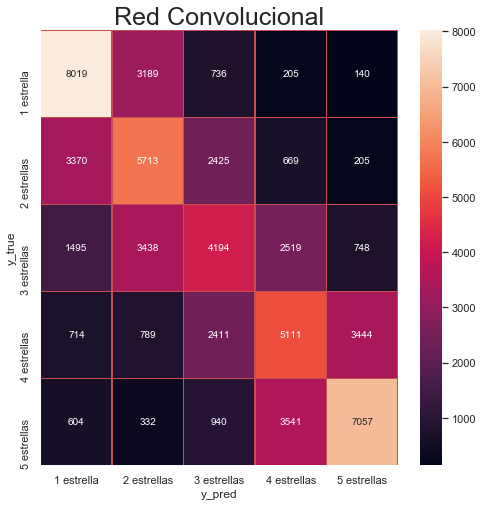

In [182]:
confusion(y_test,y_test_pred,"Red Convolucional")

In [183]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           1       0.56      0.65      0.61     12289
           2       0.42      0.46      0.44     12382
           3       0.39      0.34      0.36     12394
           4       0.42      0.41      0.42     12469
           5       0.61      0.57      0.59     12474

    accuracy                           0.49     62008
   macro avg       0.48      0.49      0.48     62008
weighted avg       0.48      0.49      0.48     62008



### ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?

<font color=black>
El resultado logrado con un modelo binario fue extremadamente mejor. Los modelos pudieron mejorar su clasificación de una forma muy eficiente. Vale destacar que desde el punto de vista del usuario, realizar puntuaciones en positivo-negativo, en lugar de utilizar estrellas facilita la toma de la decisión.  
</font>

<font color=black>
Voy a utilizar redes neuronales para ver si se puede lograr un mejor resultado. 
</font>

In [184]:
x = {1 : 0, 2 : 0, 3 : 0, 4 : 1, 5 : 1}

data_['bin'] = data_['stars'].map(x)
data_

,stars,review_body,review_title,product_category,New_R_title_Lemm,New_R_body_Lemm,New_R_title_Lemm_ADJ,New_R_body_Lemm_ADJ,contara_title,contara_body,review_Final,New_R_final_Lemm,bin
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,electronics,television never,bueno ka pantalla 8 mes y no recibir respuesta...,[],"[bueno, fabricante]",2,19,television never bueno ka pantalla 8 mes y no ...,television never bueno ka pantalla 8 mes y no ...,0
1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,electronics,dinero tirado a basura comprar,horrible tener comprar ingl informatico hora c...,[tirado],"[horrible, ingl, informatico, capaz]",8,23,dinero tirado a basura comprar horrible tener ...,dinero tirado a basura comprar horrible compra...,0
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore,llegar unidad obligar a comprar,obligar a comprar unidad y llegar y no formar ...,[],[autentico],10,22,llegar unidad obligar a comprar obligar a comp...,llegar unidad obligar a comprar obligar a comp...,0
3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,wireless,producto no recibir,no entrar descalificar vendedor mes esperar se...,[],"[amazon, desembolsado, perdido]",3,60,producto no recibir no entrar descalificar ven...,producto no recibir no entrar descalificar ven...,0
4,1,Llega tarde y co la talla equivocada,Devuelto,shoes,devuelto,llegar y co talla equivocado,[devuelto],[equivocado],1,7,devuelto llegar y co talla equivocado,devuelto llegar y co talla equivocado,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206687,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,wireless,em,envio nefasto no casa y tirar paquete muro sue...,[],"[nefasto, rompio]",5,28,em envio nefasto no casa y tirar paquete muro ...,em envio nefasto no casa y tirar paquete muro ...,1
206688,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",wireless,no recomendar,calidad pesimo si ser peor estariar hecho pape...,[],"[pesimo, peor, hecho]",5,9,no recomendar calidad pesimo si ser peor estar...,no recomendar calidad pesimo si peor estario p...,1
206689,5,Se ve bien el grabado,medallas con bonito grabado,home,bonito fragil,maleta gusto infelizmente rompio base rueda viaje,"[bonito, fragil]",[rompio],4,5,bonito fragil maleta gusto infelizmente rompio...,bonito fragil maleta gusto infelizmente rompio...,1
206690,5,lo compré para mi bici pero finalmente se lo h...,timbre,sports,nagore,no convencer no llegar a cubrir pantalla desil...,[nagore],"[desilusion, perdido, comprado]",1,39,nagore no convencer no llegar a cubrir pantall...,nagore no convencer no llegar a cubrir pantall...,1


In [185]:
def confusion(y_test,y_test_pred,X):
    names=["positivo","negativo"]
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(8,8))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### LinearSVC

In [186]:
data_['New_R_final_Lemm'] = data_['New_R_final_Lemm'].apply(str)

list_revs = list(data_['New_R_final_Lemm'].values)

tfidf = TfidfVectorizer(max_features=1000,lowercase=False)

matriz_revs = tfidf.fit_transform(list_revs)

# Tomamos las palabras
all_words = tfidf.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['10', '100', '12', '15', '20', '24', '30', '40', '50', 'abajo', 'abierto', 'abrir', 'absoluto', 'acabado', 'acabar', 'accesorio', 'aceite', 'aceptable', 'acero', 'acierto', 'acolchado', 'aconsejar', 'acoplar', 'adaptador', 'adaptar', 'adecuado', 'adherir', 'adhesivo', 'adulto', 'agarrar', 'agarre', 'agradable', 'agua', 'aguantar', 'agujero', 'aguo', 'aire', 'ajustado', 'ajustar', 'ajuste', 'alguien', 'algun', 'altavoz', 'alto', 'altura', 'alumbrar', 'amarillo', 'amazon', 'amigo', 'amplio']


In [187]:
x = matriz_revs.toarray()
y = data_["bin"].values


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [188]:
svc = LinearSVC(C = 1)
svc.fit(X_train,y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Accuracy train LinearSVC: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test LinearSVC: ", accuracy_score(y_test, y_test_pred))

Accuracy train LinearSVC:  0.8414821265654806
Accuracy test LinearSVC:  0.8368758869823248


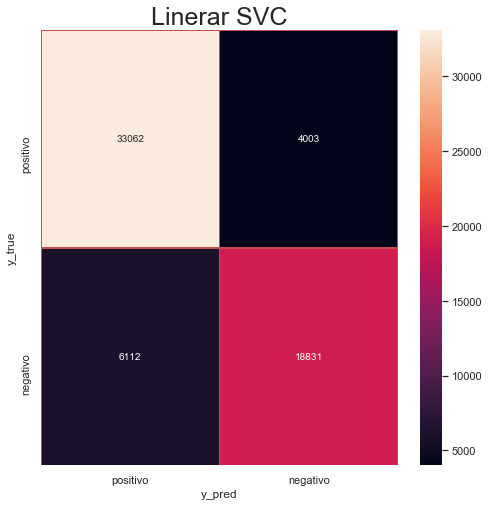

In [189]:
confusion(y_test,y_test_pred,"Linerar SVC")

In [190]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     37065
           1       0.82      0.75      0.79     24943

    accuracy                           0.84     62008
   macro avg       0.83      0.82      0.83     62008
weighted avg       0.84      0.84      0.84     62008



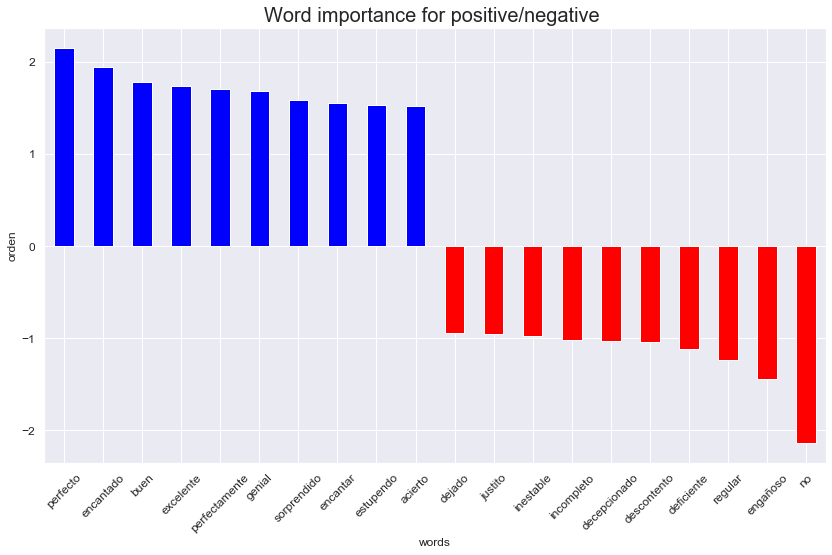

In [191]:
coeff = list(svc.coef_[0])
labels = list(all_words)
importancia = pd.DataFrame()
importancia['words'] = labels
importancia['orden'] = coeff
importancia = importancia.reset_index(drop=True)
orden_imp = importancia.sort_values(by=['orden'], ascending=False)
orden_imp = orden_imp.reset_index(drop=True)
plot = pd.concat([orden_imp.head(10), orden_imp.tail(10)])
plot.sort_values(by=['orden'], ascending=False, inplace = True)
plot['vpos'] = plot['orden'] > 0
plot.set_index('words', inplace = True)
plot.orden.plot(kind='bar', figsize = (14,8),color = plot.vpos.map({True: 'blue', False: 'red'}),fontsize=12,orientation=u'vertical')
plt.xlabel ('words', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel ('orden', rotation = 90, fontsize=12)
plt.title ('Word importance for positive/negative ',fontsize=20)
plt.show()

In [192]:
gc.collect

<function gc.collect(generation=2)>

### Red Simple

In [193]:
X = data_['New_R_final_Lemm']
y = data_["bin"].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [194]:
max_words = 4000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = tokenizer.sequences_to_matrix(X_train, mode='count')
X_test = tokenizer.sequences_to_matrix(X_test, mode='count')


num_classes = max(y_train) + 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [195]:
model = Sequential()
model.add(Dense(128, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [196]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.metrics_names)

['loss', 'accuracy']


In [197]:
batch_size = 64
epochs = 20

In [198]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 115747 samples, validate on 28937 samples
Epoch 1/20
115747/115747 [==============================] - 40s 346us/step - loss: 0.4335 - accuracy: 0.8229 - val_loss: 0.3789 - val_accuracy: 0.8448
Epoch 2/20
115747/115747 [==============================] - 37s 321us/step - loss: 0.3802 - accuracy: 0.8504 - val_loss: 0.3689 - val_accuracy: 0.8493
Epoch 3/20
115747/115747 [==============================] - 37s 320us/step - loss: 0.3556 - accuracy: 0.8625 - val_loss: 0.3698 - val_accuracy: 0.8490
Epoch 4/20
115747/115747 [==============================] - 34s 298us/step - loss: 0.3311 - accuracy: 0.8735 - val_loss: 0.3867 - val_accuracy: 0.8448
Epoch 5/20
115747/115747 [==============================] - 35s 299us/step - loss: 0.3059 - accuracy: 0.8840 - val_loss: 0.3934 - val_accuracy: 0.8477
Epoch 6/20
115747/115747 [==============================] - 35s 299us/step - loss: 0.2843 - accuracy

In [199]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

62008/62008 [==============================] - 6s 101us/step
Test loss: 0.7109859451380504
Test accuracy: 0.831795871257782


In [200]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test=np.argmax(y_test, axis=1)
y_test_pred=np.argmax(y_test_pred, axis=1)

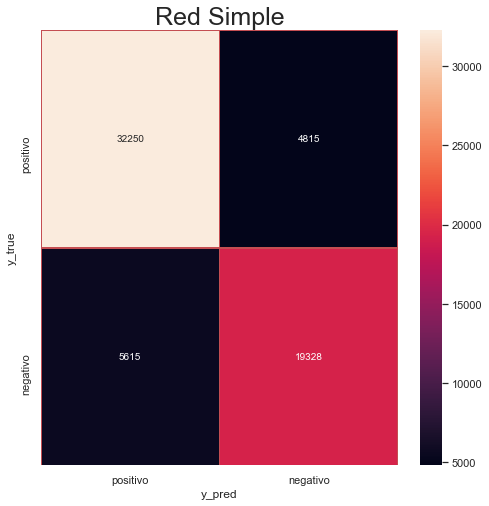

In [201]:
confusion(y_test,y_test_pred,"Red Simple")

In [202]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     37065
           1       0.80      0.77      0.79     24943

    accuracy                           0.83     62008
   macro avg       0.83      0.82      0.82     62008
weighted avg       0.83      0.83      0.83     62008



### Convolucional

In [203]:
X = data_['New_R_final_Lemm']
y = data_["bin"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

MAX_NB_WORDS = 5000

MAX_SEQUENCE_LENGTH = 250

EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)



num_classes = max(y_train) + 1

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [204]:
EMBEDDING_DIM=300

In [205]:
model = Sequential()
embedding_layer= (Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(embedding_layer)
model.add(Conv1D(300, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(150, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [206]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 300)          1500000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 246, 300)          450300    
_________________________________________________________________
dropout_11 (Dropout)         (None, 246, 300)          0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_13 (Dropout)         (None, 150)              

In [207]:
epochs = 20
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

C:\Users\Gammapeit\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 115747 samples, validate on 28937 samples
Epoch 1/20
115747/115747 [==============================] - 1596s 14ms/step - loss: 0.4131 - acc: 0.8256 - val_loss: 0.3609 - val_acc: 0.8527
Epoch 2/20
115747/115747 [==============================] - 1601s 14ms/step - loss: 0.3594 - acc: 0.8579 - val_loss: 0.3594 - val_acc: 0.8502
Epoch 3/20
115747/115747 [==============================] - 1607s 14ms/step - loss: 0.3384 - acc: 0.8688 - val_loss: 0.3615 - val_acc: 0.8513
Epoch 4/20
115747/115747 [==============================] - 1604s 14ms/step - loss: 0.3194 - acc: 0.8791 - val_loss: 0.3711 - val_acc: 0.8497
Epoch 5/20
115747/115747 [==============================] - 1575s 14ms/step - loss: 0.2999 - acc: 0.8893 - val_loss: 0.3847 - val_acc: 0.8449
Epoch 6/20
115747/115747 [==============================] - 1576s 14ms/step - loss: 0.2821 - acc: 0.8978 - val_loss: 0.4009 - val_acc: 0.8426
Epoch 7/20
115747/115747 [==============================] - 1583s 14ms/step - loss: 0.2670 - acc:

In [208]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

62008/62008 [==============================] - 201s 3ms/step
Test loss: 0.6264973617633564
Test accuracy: 0.8181202411651611


In [209]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_test=np.argmax(y_test, axis=1)
y_test_pred=np.argmax(y_test_pred, axis=1)

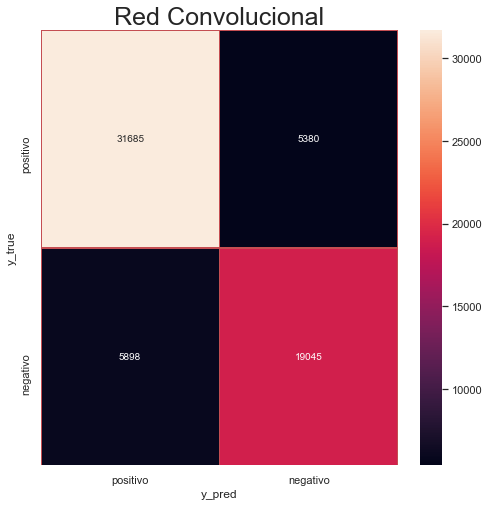

In [210]:
confusion(y_test,y_test_pred,"Red Convolucional")

In [211]:
print(classification_report(y_test, y_test_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     37065
           1       0.78      0.76      0.77     24943

    accuracy                           0.82     62008
   macro avg       0.81      0.81      0.81     62008
weighted avg       0.82      0.82      0.82     62008



<font color=black>
La necesidad para entrenar esas complejas redes de neuronas requiere aumentar la capacidad de procesamiento. En este punto cabe mencionar que me tomó 18 horas realizar los cálculos ya que entre más compleja e inteligente es la red neuronal, mejores resultados tendrán las predicciones, pero igualmente es mucho más complicado idear un modelo así. .
</font>